In [1]:
import pandas as pd
import matplotlib.pyplot as plt

graduate = pd.read_csv('https://bit.ly/GraduateFile')
graduate

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


#### 열의 데이터형식과 값의 개수 등 확인

In [2]:
graduate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


#### 기초통계정보 확인

In [3]:
graduate.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


#### gre 중앙값 확인

In [4]:
graduate['gre'].median()

580.0

#### rank 별 gre 중앙값 집계하여 tmp 데이터프레임 선언

In [6]:
tmp = graduate.groupby('rank')['gre'].median()
tmp

rank
1    600
2    600
3    580
4    560
Name: gre, dtype: int64

#### rank, admit 별 gpa 평균 집계하여 tmp 데이터프레임 선언

In [8]:
tmp = graduate.groupby(['rank', 'admit'])[['gpa']].mean()
tmp

gpa
rank admit          
1    0      3.345714
     1      3.544242
2    0      3.316598
     1      3.442593
3    0      3.402258
     1      3.534643
4    0      3.291455
     1      3.441667

#### rank별 합격자 수 집계하여 tmp 데이터프레임 선언 후 막대그래프 시각화

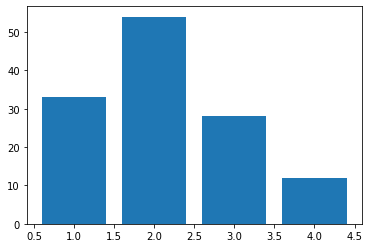

In [72]:
tmp1 = graduate.groupby('rank')[['admit']].sum()
tmp1.reset_index(inplace=True)

plt.bar(tmp1['rank'], tmp1['admit'])
plt.show()

#### rank별 합격율 집계하여 tmp 데이터프레임 선언 후 막대그래프 시각화

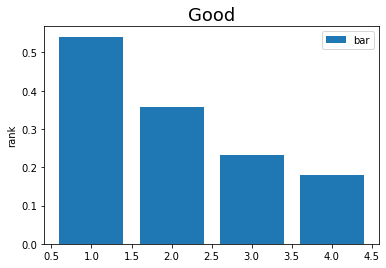

In [65]:
tmp2 = graduate.groupby('rank')[['admit']].mean()
tmp2.reset_index(inplace=True)

plt.bar(tmp2['rank'], tmp2['admit'])

# plt.plot(graduate['rank'])

plt.title('Good', fontsize=18)
plt.legend(['bar', 'plot'])
plt.ylabel('rank')
plt.show()